为了完成这些任务，我们将使用Python中的一些常用库，如`pandas`、`matplotlib`、`seaborn`、`scikit-learn`等。以下是逐步的代码实现：


### 1. 描述统计

#### 1.1 平均年龄及年龄分布

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('Hair.csv')

# 平均年龄
average_age = df['Age'].mean()
print(f"平均年龄: {average_age:.2f}")

# 年龄分布
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('年龄分布')
plt.xlabel('年龄')
plt.ylabel('频率')
plt.show()
```

#### 1.2 最常见的医疗条件及其频率

```python
# 最常见的医疗条件
medical_conditions = df['Medical Conditions'].value_counts()
print("最常见的医疗条件及其频率:")
print(medical_conditions)
```

#### 1.3 营养缺乏的种类及其出现频率

```python
# 营养缺乏的种类及其频率
nutritional_deficiencies = df['Nutritional Deficiencies '].value_counts()
print("营养缺乏的种类及其出现频率:")
print(nutritional_deficiencies)
```

### 2. 可视化

#### 2.1 不同年龄段中患者脱发的比例

```python
# 将年龄分组
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 100], labels=['0-20', '21-30', '31-40', '41-50', '51+'])

# 计算不同年龄段的脱发比例
hair_loss_by_age = df.groupby('Age Group')['Hair Loss'].mean()

# 可视化
plt.figure(figsize=(10, 6))
hair_loss_by_age.plot(kind='bar')
plt.title('不同年龄段中患者脱发的比例')
plt.xlabel('年龄段')
plt.ylabel('脱发比例')
plt.show()
```

#### 2.2 哪些因素与脱发之间存在关联

```python
# 计算各因素与脱发的相关性
correlation = df.corr()['Hair Loss'].sort_values(ascending=False)
print("各因素与脱发的相关性:")
print(correlation)
```

#### 2.3 不同压力水平下脱发的情况

```python
# 不同压力水平下脱发的情况
stress_hair_loss = df.groupby('Stress')['Hair Loss'].mean()

# 可视化
plt.figure(figsize=(10, 6))
stress_hair_loss.plot(kind='bar')
plt.title('不同压力水平下脱发的情况')
plt.xlabel('压力水平')
plt.ylabel('脱发比例')
plt.show()
```

### 3. 机器学习

#### 3.1 建立分类模型预测脱发

```python
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 数据预处理
df = pd.get_dummies(df, columns=['Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking', 'Weight Loss'])

# 特征和标签
X = df.drop(['Hair Loss', 'Id'], axis=1)
y = df['Hair Loss']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练模型
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
print("分类报告:")
print(classification_report(y_test, y_pred))
print(f"准确率: {accuracy_score(y_test, y_pred):.2f}")
```

#### 3.2 聚类分析探索不同类型的脱发群体

```python
from sklearn.cluster import KMeans

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# 可视化聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Hair Loss', hue='Cluster', data=df, palette='viridis')
plt.title('聚类分析结果')
plt.show()
```

#### 3.3 使用决策树识别预测脱发的关键因素

```python
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 训练决策树模型
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['No Hair Loss', 'Hair Loss'])
plt.title('决策树')
plt.show()

# 特征重要性
feature_importance = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("特征重要性:")
print(feature_importance_df)
```

### 总结

以上代码完成了描述统计、可视化和机器学习任务。通过这些步骤，你可以更好地理解数据，并建立模型来预测脱发。

平均年龄: 34.19


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site

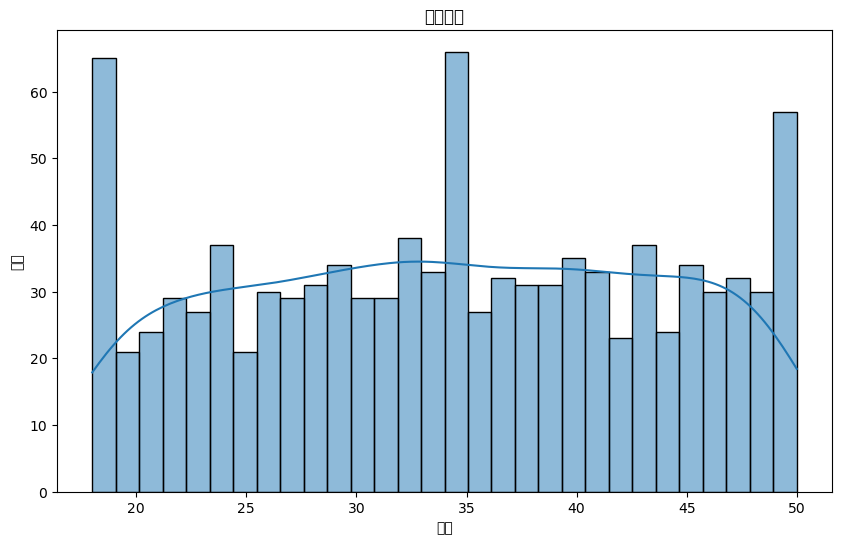

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('Hair.csv')

# 平均年龄
average_age = df['Age'].mean()
print(f"平均年龄: {average_age:.2f}")

# 年龄分布
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('年龄分布')
plt.xlabel('年龄')
plt.ylabel('频率')
plt.show()

In [5]:
# 最常见的医疗条件
medical_conditions = df['Medical Conditions'].value_counts()
print("最常见的医疗条件及其频率:")
print(medical_conditions)


最常见的医疗条件及其频率:
Medical Conditions
No Data                  110
Alopecia Areata          107
Psoriasis                100
Thyroid Problems          99
Androgenetic Alopecia     98
Dermatitis                92
Dermatosis                88
Seborrheic Dermatitis     88
Scalp Infection           79
Eczema                    69
Ringworm                  69
Name: count, dtype: int64


In [6]:
nutritional_deficiencies = df['Nutritional Deficiencies '].value_counts()
print("营养缺乏的种类及其出现频率:")
print(nutritional_deficiencies)

营养缺乏的种类及其出现频率:
Nutritional Deficiencies 
Zinc Deficiency         108
Vitamin D Deficiency    104
Biotin Deficiency        99
Vitamin A Deficiency     99
Omega-3 fatty acids      92
Protein deficiency       90
Magnesium deficiency     84
Vitamin E deficiency     83
Selenium deficiency      82
No Data                  80
Iron deficiency          78
Name: count, dtype: int64


C:\Users\Dy-YsS02\AppData\Local\Temp\ipykernel_32856\771822109.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hair_loss_by_age = df.groupby('Age Group')['Hair Loss'].mean()
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33073 (\N{CJK UNIFIED IDEOGRAPH-8131}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core

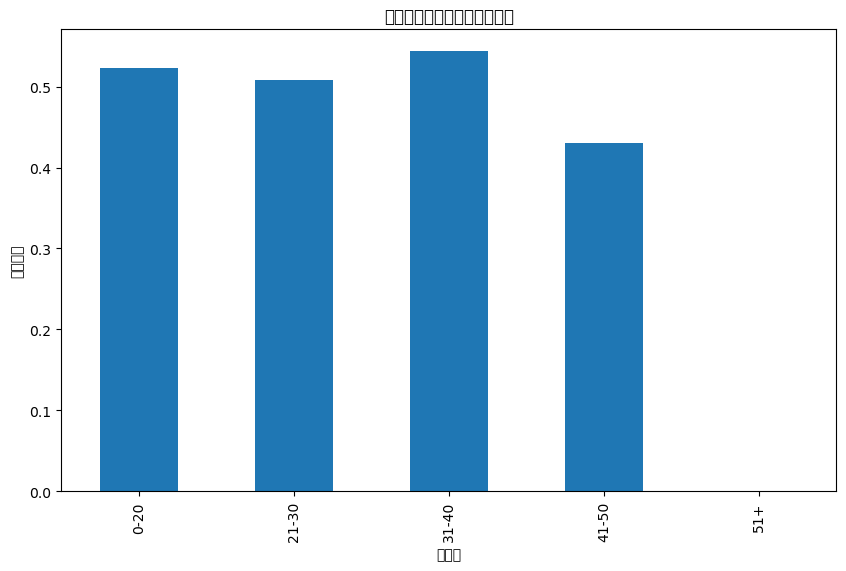

In [7]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 100], labels=['0-20', '21-30', '31-40', '41-50', '51+'])

# 计算不同年龄段的脱发比例
hair_loss_by_age = df.groupby('Age Group')['Hair Loss'].mean()

# 可视化
plt.figure(figsize=(10, 6))
hair_loss_by_age.plot(kind='bar')
plt.title('不同年龄段中患者脱发的比例')
plt.xlabel('年龄段')
plt.ylabel('脱发比例')
plt.show()

In [8]:
correlation = df.corr()['Hair Loss'].sort_values(ascending=False)
print("各因素与脱发的相关性:")
print(correlation)

ValueError: could not convert string to float: 'Yes'

In [11]:
# 检查列名
print("原始列名:", df.columns)

# 去除列名中的空格
df.columns = df.columns.str.strip()

# 再次检查列名
print("修正后的列名:", df.columns)

# 确保 'Weight Loss' 列存在
if 'Weight Loss' in df.columns:
    print("'Weight Loss' 列存在")
else:
    print("'Weight Loss' 列不存在，请检查数据")

原始列名: Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss', 'Age Group'],
      dtype='object')
修正后的列名: Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Age',
       'Poor Hair Care Habits', 'Environmental Factors', 'Smoking',
       'Weight Loss', 'Hair Loss', 'Age Group'],
      dtype='object')
'Weight Loss' 列存在


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 数据预处理
df = pd.get_dummies(df, columns=['Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Poor Hair Care Habits', 'Environmental Factors', 'Smoking', 'Weight Loss'])

# 特征和标签
X = df.drop(['Hair Loss', 'Id'], axis=1)
y = df['Hair Loss']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练模型
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
print("分类报告:")
print(classification_report(y_test, y_pred))
print(f"准确率: {accuracy_score(y_test, y_pred):.2f}")

ValueError: Cannot cast object dtype to float32

In [10]:
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss', 'Age Group'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 数据预处理
# 对分类变量进行 One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=[
    'Genetics', 
    'Hormonal Changes', 
    'Medical Conditions', 
    'Medications & Treatments', 
    'Nutritional Deficiencies', 
    'Stress', 
    'Poor Hair Care Habits', 
    'Environmental Factors', 
    'Smoking', 
    'Weight Loss'
])

# 特征和标签
X = df_encoded.drop(['Hair Loss', 'Id'], axis=1)  # 移除目标列和无关列
y = df_encoded['Hair Loss']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练模型
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
print("分类报告:")
print(classification_report(y_test, y_pred))
print(f"准确率: {accuracy_score(y_test, y_pred):.2f}")

KeyError: "None of [Index(['Genetics', 'Hormonal Changes', 'Medical Conditions',\n       'Medications & Treatments', 'Nutritional Deficiencies', 'Stress',\n       'Poor Hair Care Habits', 'Environmental Factors', 'Smoking',\n       'Weight Loss'],\n      dtype='object')] are in the [columns]"